## Assignment 6.2a

In [43]:
#Import required libraries
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import layers,  models,  optimizers
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense, Flatten

from matplotlib import pyplot
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
tf.config.run_functions_eagerly  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [44]:
#splitting into training and test sets
# load dataset
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

In [45]:
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255
x_val_train = x_train[:10000]
x_train = x_train[10000:]

#Convert target data to single array of shape (50000,) and (10000,)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
y_val_train = y_train[:10000]
y_train = y_train[10000:]

In [46]:
#Build the model without dropout or data-augmentation
from keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='same', 
                 input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 128)       

In [51]:
#Configure the model for training
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

In [52]:
#Fit the model
history = model.fit(
      x_train,y_train,
      epochs=30,
      batch_size=64,
      validation_data=(x_val_train,y_val_train),
      validation_steps=50)

Epoch 1/30
625/625 [==============================] - 34s 52ms/step - loss: 1.9091 - acc: 0.3082 - val_loss: 1.7230 - val_acc: 0.3700
Epoch 2/30
625/625 [==============================] - 42s 67ms/step - loss: 1.6238 - acc: 0.4171 - val_loss: 1.5416 - val_acc: 0.4531
Epoch 3/30
625/625 [==============================] - 41s 66ms/step - loss: 1.5026 - acc: 0.4589 - val_loss: 1.4667 - val_acc: 0.4681
Epoch 4/30
625/625 [==============================] - 34s 54ms/step - loss: 1.4249 - acc: 0.4881 - val_loss: 1.3969 - val_acc: 0.4934
Epoch 5/30
625/625 [==============================] - 35s 55ms/step - loss: 1.3649 - acc: 0.5163 - val_loss: 1.3238 - val_acc: 0.5266
Epoch 6/30
625/625 [==============================] - 44s 70ms/step - loss: 1.3132 - acc: 0.5348 - val_loss: 1.2730 - val_acc: 0.5581
Epoch 7/30
625/625 [==============================] - 32s 51ms/step - loss: 1.2657 - acc: 0.5550 - val_loss: 1.2511 - val_acc: 0.5525
Epoch 8/30
625/625 [==============================] - 29s 47ms

In [53]:
# Evaluate the model
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 6s 18ms/step - loss: 0.9508 - acc: 0.6800
[0.950763463973999, 0.6800000071525574]


In [54]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

In [55]:
# Saving Model files to results folder 
model.save('results/Assignment_6-2a_model.h5')
print('Saved 6.2a trained model to results folder')

Saved 6.2a trained model to results folder


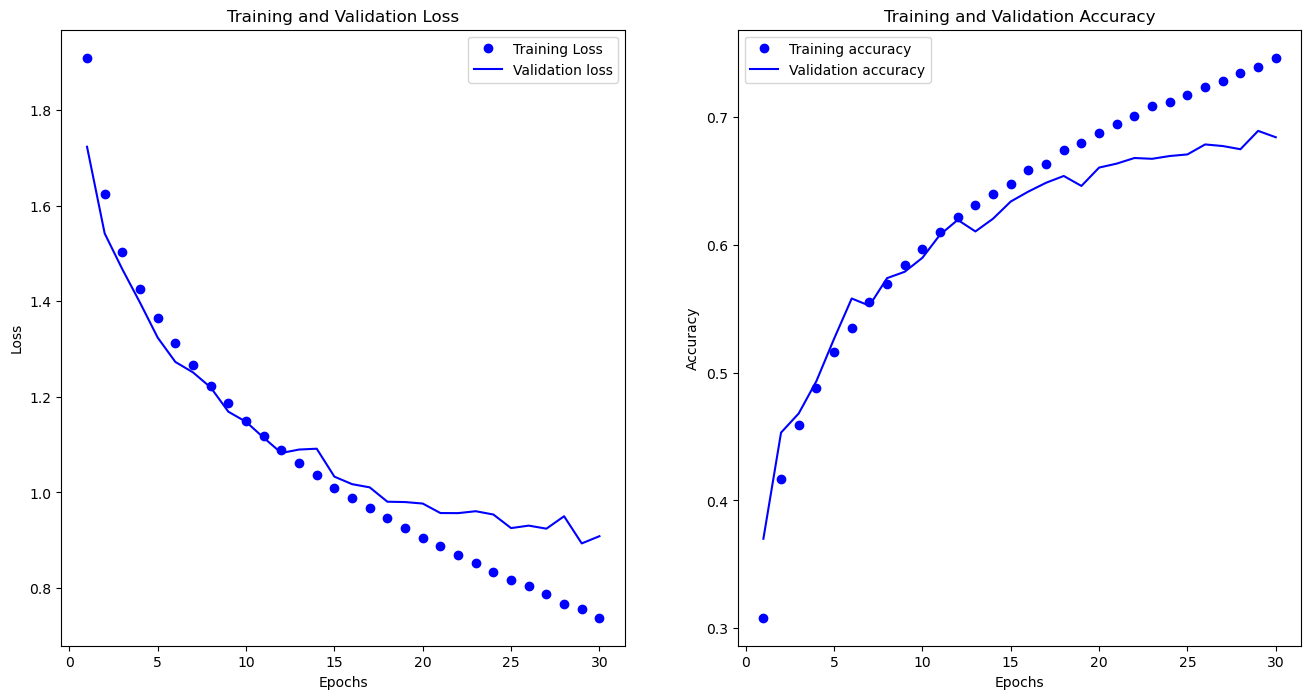

In [56]:
# Plotting metrics

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('results/Assignment_6-2a_Loss.png')

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()
plt.savefig('results/Assignment_6.2a_Accuracy.png')
plt.show()

In [57]:
import pandas as pd

with open('results/Assignment_6-2a_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['acc'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))
predictions = pd.DataFrame(pred_res)
predictions.to_csv('results/Assignment_6-2a_predictions.csv', index=False)

## Assignment 6.2b

In [73]:
from keras.preprocessing.image import ImageDataGenerator

In [74]:
# Includes dropout 
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [76]:
# Configure the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['acc'])

In [77]:
# Includes data-augumentation - rotation, width shift, height shift, etc.

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)

In [78]:
#Fit the model
history = model.fit(datagen.flow(x_train, 
                                 y_train,
                                 batch_size=64),
                    epochs=30,
                    validation_data=(x_val_train, y_val_train),
                    workers=4, 
                    verbose=False) 

In [79]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 8s 26ms/step - loss: 1.2053 - acc: 0.5789
[1.2052512168884277, 0.5788999795913696]


In [80]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

In [81]:
# Saving Model files to results folder
model.save('results/Assignment_6-2b_model.h5')
print('Saved 6.2b trained model to results folder')

Saved 6.2b trained model to results folder


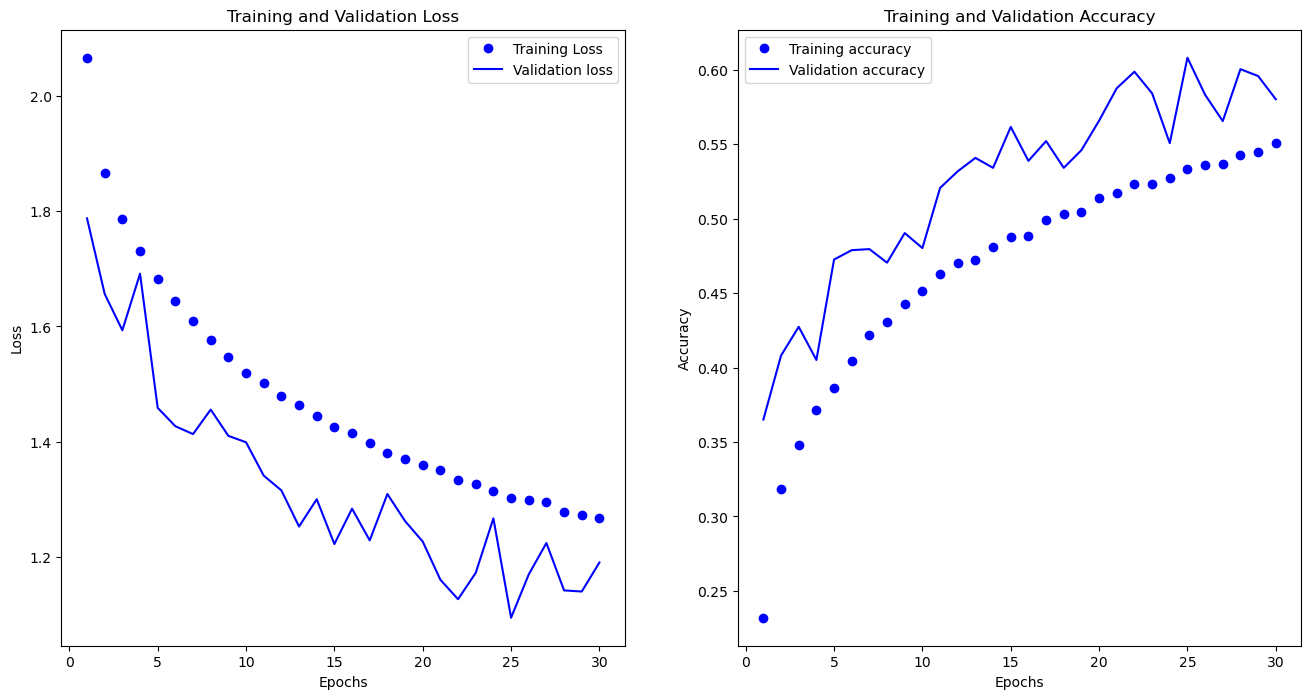

In [82]:
# Plotting metrics
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,8))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('results/Assignment_6-2b_Loss.png')
ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend() 

plt.savefig('results/Assignment_6-2b_Accuracy.png')
plt.show()

In [83]:
with open('results/Assignment_6-2b_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['acc'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))
predictions = pd.DataFrame(pred_res)
predictions.to_csv('results/Assignment_6-2b_predictions.csv', index=False)